# Diagonalisation par les polynômes de Chebyshev

On considère l'Hamiltonien quantique d'un oscillateur anharmonique
$$
H_\mu=\frac 12\left(-\frac{\partial^2}{\partial x^2}+x^2\right)+\frac\mu 4 x^4
$$
sur les fonctions $\psi(x)$, $x\in[-L,L]$ avec $\psi(-L)=\psi(L)=0$ (conditions aux bords de Dirichlet).

On fait le changement de variable $\varphi(x)=\psi(x/L)$ pour obtenir l'opérateur équivalent
\begin{align*}
H_\mu&=\frac 12\left(-\frac 1{L^2}\frac{\partial^2}{\partial x^2}+L^2x^2\right)+\frac\mu 4 L^4x^4\\
&=-\frac 1{2L^2}\frac{\partial^2}{\partial x^2}+V_\mu(x)
\end{align*}
sur les fonctions $\varphi(x)$, $x\in[-1,1]$ avec $\varphi(-L)=\varphi(L)=0$.

Calculer les points de Lobatto $x_k=\cos\left(\frac{k\pi}N\right)$, $k=0,\dots,N$ et la matrice de différentiation
$D$ de dimension $(N+1)\times(N+1)$ dont les éléments sont donnés par

\begin{align*}
D_{00}&=\frac{2N^2+1}{6},\\
D_{kk}&=\frac{-x_k}{2(1-x_k)^2}\qquad k=1,\dots,N-1,\\
D_{kj}&=\frac{c_k(-1)^{k+j}}{c_j(x_k-x_j)}\qquad k\neq j,~k,j=1,\dots,N-1, \\
D_{NN}&=-D_{00}=-\frac{2N^2+1}{6}.
\end{align*}

On représente $H_\mu$ par la matrice $(N-1)\times(N-1)$ suivante:
$$
H_\mu=-\frac 1{2L^2}\left.\left(D\cdot D\right)\right|_{1\dots N-1}+\mathrm{diag}\left(V_\mu(x_1),\dots,V_\mu(x_{N-1})\right).
$$
La notation $\left(D\cdot D\right)|_{1\dots N-1}$ signifie que l'on calcule $D\cdot D$ (produit de matrices $(N+1)\times (N+1)$), puis que l'on réduit la matrice aux $(N-1)\times (N-1)$ éléments $i=1,\dots,N-1$, $j=1,\dots,N-1$.

Finalement calculer les valeurs et vecteurs propres de $H_\mu$ en utilisant [linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

Utiliser les paramètres suivants: 

 * $N=70$, $L=10$, 
 * $0\le\mu\le1$ (p.ex. 10 valeurs),
 * garder pour chaque valeur de $\mu$ les 10 valeurs propres $\lambda_0,\dots,\lambda_9$ les plus petites, ainsi que le vecteur propre $v_4$ correspondant à $\lambda_4$.

## Valeurs propres

Dessiner $\lambda_n$ en fonction de $\mu$, comparer avec les valeurs connues pour $\mu=0$: $\lambda_n^{(0)}=\frac 12+n$.

## Fonctions propres

Calculer et dessiner la fonction propre $\varphi_4(x)$ correspondant aux vecteurs propres calculés ci dessus:
$$
\varphi_4(x)=(1-x^2)^{1/4}C_4(x)
$$
où $C_4$ est la série de Chebyshev qui interpole les valeurs $(x(k), v_4(k))$, calculée à l'aide de [chebyshev.chebfit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebfit.html). 
Les coefficients sont
```python
coefs = npoly.chebyshev.chebfit(x, vec, N)
```
et la fonction correspondante
```python
phi = npoly.chebyshev.Chebyshev(coefs)(y)
```
évaluée aux points $y$ de votre choix.

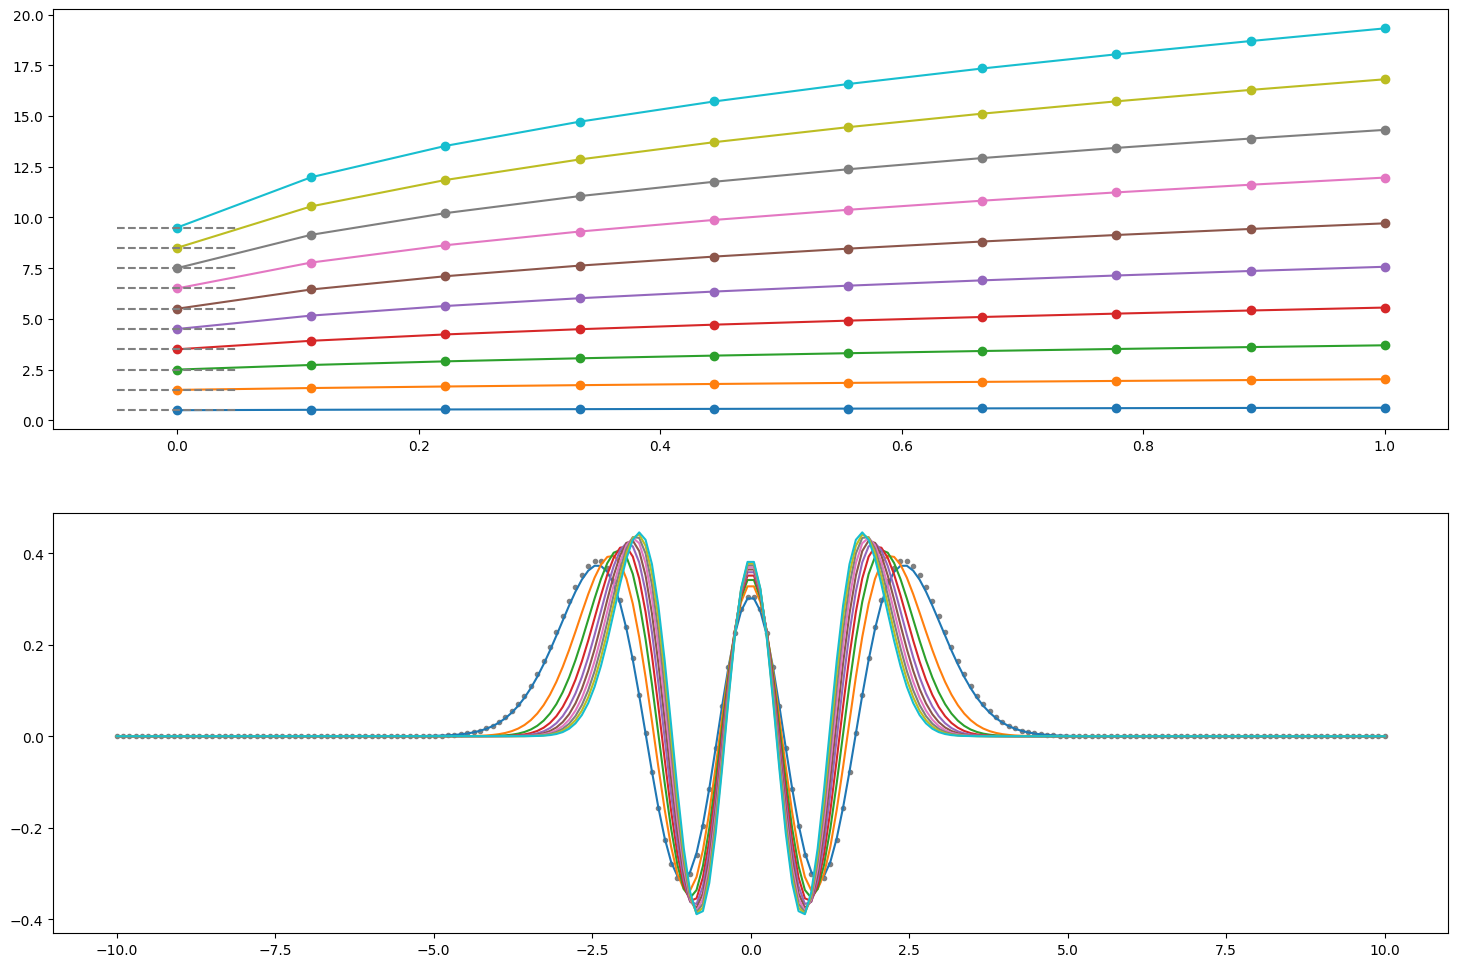

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import polynomial as npoly

N = 70
x = np.cos(np.pi*np.arange(N+1)/N)
D = np.zeros((N+1, N+1))
for i in np.arange(N+1):
    for j in np.arange(i+1,N+1):
        D[i,j] = (-1)**(i+j)/(x[i]-x[j])
        D[j,i] = (-1)**(i+j)/(x[j]-x[i])
D[0,:] *= 2
D[N,:] *= 2
D[:,0] /= 2
D[:,N] /= 2
for i in np.arange(1,N):
    D[i,i] = -0.5*x[i]/(1-x[i]**2)
D[0,0] = (2*N*N+1)/6
D[N,N] = -(2*N*N+1)/6

L = 10
L2 = L*L
nl = 10
nm = 10
D2 = np.matmul(D,D)[1:(N-1), 1:(N-1)]
H0 = (-D2/L2+L2*np.diag(x[1:(N-1)]**2))/2
evalmu = np.zeros((nl, nm))
evecmu = np.zeros((N+1, nm))
mu = np.linspace(0, 1, nm)
for n1,mu1 in enumerate(mu):
    H1 = H0+mu1*L2*L2*np.diag(x[1:(N-1)]**4)/4
    evals,evecs = np.linalg.eig(H1)
    l10 = np.sort(evals.real)[:10]
    evalmu[:,n1] = l10
    i5 = np.where(evals.real == l10[4])[0]
    evecmu[1:(N-1),n1] = evecs[:, i5].T

fig,ax = plt.subplots(2, 1, figsize=(18,12))
for nl1 in range(nl):
    ax[0].plot(mu, evalmu[nl1,:], '-o')
ax[0].hlines(0.5+np.arange(nl), -.05, .05, color='grey', linestyles='dashed')
xx = np.linspace(-1, 1, 200)
h04 = np.polynomial.Hermite((0,0,0,0,1))(L*xx)*np.exp(-L2*xx**2/2)
norm = np.abs(evecmu[N//2, 0]/h04[100])
ax[1].plot(L*xx, norm*h04, '.', color='grey', linewidth=8)
for nm1 in range(nm):
    y = npoly.chebyshev.Chebyshev(npoly.chebyshev.chebfit(x, evecmu[:, nm1], N))(xx)
    y *= np.sign(y[100])
    ax[1].plot(L*xx, y*(1-xx**2)**0.25, '-')
plt.show()

